# Libraries

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

# Model intialization

In [2]:
class feature_extraction():
    def __init__(self):
        model = VGG16(weights='imagenet')
        self.model = Model(inputs=model.input, outputs=model.get_layer('fc1').output)

    def extract(self, img):
        img = img.resize((224,224))
        img = img.convert('RGB')
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

# Data loading and extraction

In [3]:
fe = feature_extraction()
base_path = 'C:/Users/dhuli/iCloudDrive/MS/TAMU_MS/1st_Sem/Pattern_recognition/Project/code/'
images = os.listdir(base_path+'dataset/')

# Feature extraction

In [ ]:
for img in images:
    fmt = img.split('.')
    if fmt[-1] == 'jpg' or fmt[-1] == 'JPG':
        img_dir = base_path +'dataset/' +img
        feature = fe.extract(img=Image.open(img_dir))
        # Save the Numpy array (.npy) on designated path
        feature_path = base_path +'trained_features/' + fmt[0] + '.npy'
        np.save(feature_path, feature)

# Loading trained features

In [4]:
feat_dir = base_path +'trained_features/'
train_feat = os.listdir(feat_dir)
features = []

for feat in train_feat:
    features.append(np.load(feat_dir + feat))

features = np.array(features)
(n,d) = features.shape

# Test image

1/1 [==============================] - 0s 23ms/step


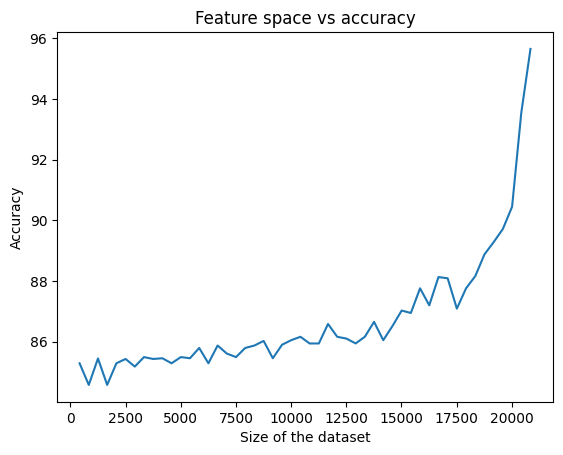

In [30]:
img_path = base_path +'dataset/'
test_img = base_path + 'cheethah.jpg'

img = Image.open(test_img)
test_feat = fe.extract(img)
x_axis = []
y_axis = []

for i in range(int(n/50), n , int(n/50)):
    dists = np.zeros(i)
    dists = np.linalg.norm(features[np.random.choice(n,i),:] - test_feat, axis=1)
    idx = np.argsort(dists)[:30]
    x_axis.append(i)
    max = dists[idx[-1]]
    if max > 1:
        max = max-1
    y_axis.append(max*100)


# idx = np.argsort(dists)[:30]
# scores = []
# for i in idx:
#     img_dir = img_path + images[i]
#     scores.append((dists[i], img_dir))
    
# # Visualize the result
# plt.imshow(Image.open(test_img))
# plt.show()

# axes=[]
# fig=plt.figure(figsize=(8,8))
# for a in range(5*6):
#     score = scores[a]
#     axes.append(fig.add_subplot(5, 6, a+1))
#     subplot_title=str(score[0])
#     axes[-1].set_title(subplot_title)  
#     plt.axis('off')
#     plt.imshow(Image.open(score[1]))
# fig.tight_layout()
# plt.show()
# y = y_axis.reverse()
plt.plot(x_axis, y_axis[::-1])
plt.title("Feature space vs accuracy")
plt.xlabel("Size of the dataset")
plt.ylabel("Accuracy")
plt.show()